In [8]:
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [9]:
CATEGORIES = ["Covid19-negative", "Covid19-positive"]

In [10]:
def prepare(filepath):
    IMG_SIZE = 224  # 50 in txt-based
    img_array = cv2.imread(filepath)# read in the image, convert to grayscale
#     print(np.shape(img_array))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,3)  # return the image with shaping that TF wants.

In [11]:
model = tf.keras.models.load_model("covid19.model")

In [12]:
directory=['trail.png','trail1.png','test_pos.jpg']
pre = []
for image in directory:
#     print(image)
    prediction = model.predict([prepare(image)])  # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT
    a = CATEGORIES[int(prediction[0][0])]
    pre.append(a)
    print(CATEGORIES[int(prediction[0][0])])
# print(int(prediction[0][0]))

Covid19-negative
Covid19-negative
Covid19-positive


In [13]:
print(pre)
# cv2.imshow(test[0])

['Covid19-negative', 'Covid19-negative', 'Covid19-positive']


3


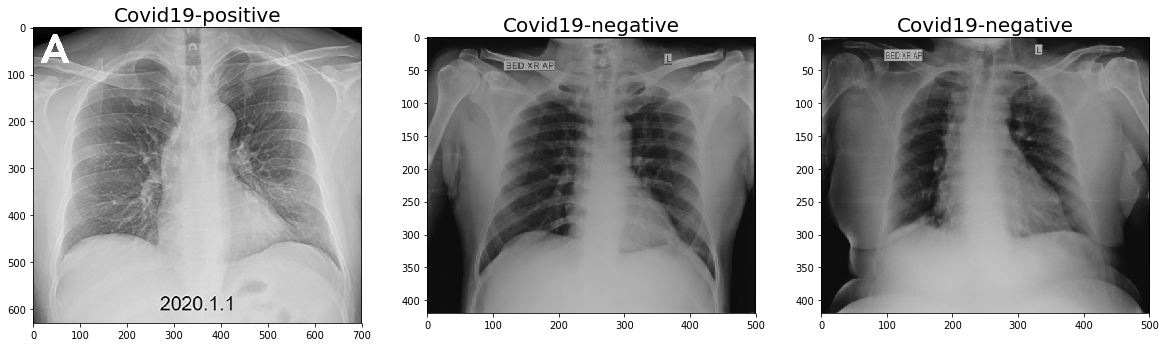

In [14]:
w=15
h=15
fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 1
test = []
for j in range(0,len(directory)):
    test.append(cv2.imread(directory[j]))
print(len(test))     
# cv2.imshow("test",test[2])
cv2.waitKey(0)
ax =[]
for i in range(0,columns*rows):  
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(pre[i-1],fontsize=20)  # set title
    plt.imshow(test[i-1])
plt.show()